<a href="https://colab.research.google.com/github/melitina915/pandas-practice/blob/main/social_network_analysis_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Analysis with Twitter

### 드라이브에 마운트

In [1]:
from google.colab import drive
drive.mount('/gdrive') 

Mounted at /gdrive


### 트위터 개발자 계정 연결하기

In [2]:
!pip install git+https://github.com/tweepy/tweepy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-2b9twkbh
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-2b9twkbh
  Resolved https://github.com/tweepy/tweepy.git to commit 0cd96b1918e5e920eb9f8fe4ba303ab5ec899c65
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.9 MB/s eta 0:00:00
  Created wheel for tweepy: filename=tweepy-4.12.1-py3-none-any.whl size=102442 sha256=f0f5802127b1ac85c669a789c5aeeb370a6802bc05f1eb02a247c142f1207673
  Stored in directory: /tmp/pip-ephem-wheel-cache-q4laq4og/wheels/ad/05/51/a78f66d15b87f9c623d2f3afc4401660ac4219e526c787fb8b
Successfully built tweepy
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uni

In [3]:
import tweepy  #트위터 데이터 스크래핑 라이브러리 

In [4]:
# 트위터 앱의 Keys and Access Tokens 탭 참조 (자신의 설정 값을 넣어준다)

api_key = 'UeVXqnzqjmV2tKvboQ6mnc9lx'

api_secret_key = 'hLRIoZ5djybHGuLF0FgPY0HFTSDdEKxY8B8Gh71WovsOrYWVlo'

In [5]:
# 1. 인증요청(1차) : 개인 앱 정보 
auth = tweepy.OAuthHandler(api_key, api_secret_key)

access_token = '1219925786041274369-1dxoeIMY0kvo2MjrZNyTuTWfu9PnZ6'

access_token_secret = 'aeZ46wimoD78d2NSrMlbWwCj99zYvR9EYPxz96e8YZh7j'

In [6]:
# 2. access 토큰 요청(2차) - 인증요청 참조변수 이용
auth.set_access_token(access_token, access_token_secret)

In [7]:
# 3. twitter API 생성  
api = tweepy.API(auth)

In [12]:
keyword = "python"       # 자신이 검색하고 싶은 키워드 입력
until = "2023-01-08"      # 특정 일자 이전의 tweet만 검색. 날짜는 ‘YYYY-MM-DD’형태로 입력
items = 100               # 몇 개의 트윗을 검색할 것인지 입력


search = []             # Scraping 결과 저장할 리스트   
for status in tweepy.Cursor(api.search_tweets, q=keyword, until=until).items(items):
    search.append(status.text)

print(len(search)) # 결과물 길이 
print(search[0]) # 첫번째 text 보기 

100
It's Poll Time, Folks!

Which of these Python IDEs do you prefer on Linux? 🐍

Did we miss the ones you use? 

Feel… https://t.co/CgrTY31teq


In [13]:
data = {}   # 전체 결과물 추가
i = 0       # 트윗 번호
for tweet in search:
    data['text'] = search[i]   # text키에 text문서 저장
    # print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

print(data)

{'text': 'يستخدم C ++ في الغالب في\nآكانيوز\n# الذكاء الاصطناعي #Al #ML\n# DataScience # DataScientists\n#CodeNewbies #Tech… https://t.co/uG1J0eMK6O'}


In [15]:
# 전체 트윗을 tweet_data 텍스트 파일로 저장

import os

wfile = open("/gdrive/My Drive/tweet_data.txt", mode='w')   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

for tweet in search:
    data['text'] = search[i]
    wfile.write(search[i]+'\n')  # 파일 출력
    i += 1

wfile.close()

In [16]:
# 파일에 scraping 해온 데이터가 잘 저장되었나 확인

file = open("/gdrive/My Drive/tweet_data.txt", 'r')

uncleaned_text = file.readlines()
file.close()

print(uncleaned_text)

# 파일에 scraping 해온 데이터가 잘 저장되었나 확인

["It's Poll Time, Folks!\n", '\n', 'Which of these\xa0Python IDEs do you prefer on Linux? 🐍\n', '\n', 'Did we miss the ones you use? \n', '\n', 'Feel… https://t.co/CgrTY31teq\n', 'RT @Sukhmanjeetkau2: #100DaysOfCodeChallenge #100DaysOfCode #SoftwareDeveloper\n', '\n', 'Day 07/100\n', '- #Python Essentials 2 - #Cisco Course\n', '- Solved…\n', 'RT @Eli_Krumova: A Guide to #DeepLearning &amp; #NeuralNetworks🕸️\n', '👉🏽https://t.co/Vc2U6DtImN\n', '\n', '#DataScience #Analytics #BigData #CNN #AI #ML #Mac…\n', 'RT @SecurityTrybe: 20 Websites for Learning Online \n', '\n', '#infosec #coding #programming #AI #DataScience #python #Science #cybersecurity #commun…\n', 'RT @Shubham_pen: Python Roadmap\n', '\n', '#infosec #cybersecurity #pentesting #oscp  #informationsecurity #hacking #cissp #redteam #technology #Data…\n', 'RT @communiess: Last night on Jimmy Kimmel, Joel said filming begins in June!\n', '#CommunityMovie \n', '(Warning: Joel is holding an Albino Burmese…\n', 'RT @PythonPr: Build a P

## 전처리, 그래프, 시각화에 필요한 라이브러리 import

In [17]:
import re
import networkx as nx
import matplotlib.pyplot as plt

### 파이썬 정규표현식을 이용해서 데이터 전처리

In [18]:
# 파이썬 정규표현식을 이용해서 데이터 전처리 (분석에 필요 없는 부분 삭제)

def clean_data(readData):
    text = re.sub('\n', '', readData)
    text = re.sub('RT', '', text) 
    text = re.sub('h\w{4}://\w\W.{13}', '', text)
    text = re.sub('&amp;', '', text)
    text = re.sub('@\w{2,15}', '', text)
    text = re.sub('^https', '', text)
    text = re.sub("[_《》….()!,'?&;*“”‘’=+-/#%]",'', text)
    text = re.sub('"','', text)
    text = re.sub('[0-9:]', '', text)
    
    text = text.lower() # 영어라서 소문자로 바꿔준다
    
    return text


In [20]:
# clean_data 함수 호출 전후 데이터 확인
print("전처리 이전 데이터 : ")
print(uncleaned_text[0])

print("전처리 이후 데이터 : ")
print(clean_data(uncleaned_text[0]))

# 데이터가 잘 정제 되었는지 확인해보자

전처리 이전 데이터 : 
It's Poll Time, Folks!

전처리 이후 데이터 : 
its poll time folks


#### 만약 트윗에 이모티콘이 있다면?

In [21]:
# 이모티콘을 제거하는 패턴 만들기
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# 이모티콘을 제거하는 함수 만들기
def remove_emoji(readData):
    text = re.sub(emoji_pattern, '', readData)
    return text


In [22]:
# remove_emoji 함수 호출 전후 데이터 확인

print("이모지 제거 이전 데이터 : ")
print(uncleaned_text[3])

print("이모지 제거 이후 데이터 : ")
print(remove_emoji(uncleaned_text[3]))

#데이터가 잘 정제 되었는지 확인해보자

이모지 제거 이전 데이터 : 


이모지 제거 이후 데이터 : 




### 반복문을 돌며 데이터 정제 함수 호출

In [23]:
cleaned_text = []

for i in range(len(uncleaned_text)):
  first_cleaned_text = clean_data(uncleaned_text[i])
  second_cleaned_text = remove_emoji(first_cleaned_text)
  
  # 한 트윗씩 거치며 새로운 리스트에 담는다.
  
  cleaned_text.append(second_cleaned_text)


print(cleaned_text)

['its poll time folks', '', 'which of these\xa0python ides do you prefer on linux ', '', 'did we miss the ones you use ', '', 'feel ', '  daysofcodechallenge daysofcode softwaredeveloper', '', 'day ', ' python essentials   cisco course', ' solved', '  a guide to deeplearning  neuralnetworks️', '', '', 'datascience analytics bigdata cnn ai ml mac', '   websites for learning online ', '', 'infosec coding programming ai datascience python science cybersecurity commun', '  python roadmap', '', 'infosec cybersecurity pentesting oscp  informationsecurity hacking cissp redteam technology data', '  last night on jimmy kimmel joel said filming begins in june', 'communitymovie ', 'warning joel is holding an albino burmese', '  build a python project to scrape youtube data using youtube data api', 'python ', '', 'getting started with design patterns design patterns with objectoriented programming using java python and type ', '  according to monty python swallows', '  mi regalo por el día de hoy'

### 토큰화를 위한 라이브러리 설치

In [24]:
# 영어 단어 토큰화 하기 위한 라이브러리
import nltk                     # natural language toolkit
nltk.download('all')

# 시간 1분~2분 정도 소요. 다 되면 True라고 뜬다.

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [25]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag # 품사판별
from nltk.corpus import stopwords

* 영어 문장에 대해서 토큰화를 수행하고, 이어서 품사 태깅을 수행
* PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NN은 명사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미

In [26]:
print(word_tokenize(cleaned_text[0]))

# 토큰화되었는지 확인

['its', 'poll', 'time', 'folks']


In [27]:
all_nouns = []

for t in range(len(cleaned_text)): # 전체 트윗 개수만큼 반복
  x = word_tokenize(cleaned_text[t]) # 토큰화
  words = pos_tag(x) # 품사 태깅
  nouns = ""
  for word, pos in words:
    if pos in ['NN', 'NNP', 'NNS']: # 명사, 고유명사, 명사의 복수형 단어만 남긴다.
      param = word      
      nouns = nouns + param + " "
  all_nouns.append(nouns)

print(all_nouns)

['poll time folks ', '', 'python ides linux ', '', 'ones ', '', 'feel ', 'daysofcodechallenge daysofcode softwaredeveloper ', '', 'day ', 'python essentials course ', '', 'guide neuralnetworks️ ', '', '', 'datascience analytics cnn ml mac ', 'websites online ', '', 'infosec datascience python science cybersecurity commun ', 'python roadmap ', '', 'cybersecurity informationsecurity redteam technology data ', 'night jimmy kimmel joel begins june ', 'communitymovie ', 'joel albino burmese ', 'python project data youtube data api ', 'python ', '', 'design patterns design python type ', 'monty python swallows ', 'mi regalo por día hoy ', '', 'si quieres programar python este es mi curso desde cero ', '', 'fundamentos h y ', 'rust python cybersecurity security ', 'iron cross plane von ', 'python coding boot camps ', '', 'courses ', 'baggallini calais crossbody python print ', '', 'daysofcodechallenge daysofcode softwaredeveloper ', '', 'day ', 'python essentials course ', 'solv ', 'لمشهد من 

In [28]:
# 한 트윗 안에 중복 단어가 있는지 점검

file = open('dummy.txt', 'w')
for article in all_nouns:
  article = list(set(article.split())) # 단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
  print(article)
  for i in range(len(article)):
    file.write(article[i]+' ')
  file.write('\n')
file.close()
  

['folks', 'time', 'poll']
[]
['linux', 'python', 'ides']
[]
['ones']
[]
['feel']
['softwaredeveloper', 'daysofcode', 'daysofcodechallenge']
[]
['day']
['course', 'python', 'essentials']
[]
['guide', 'neuralnetworks️']
[]
[]
['datascience', 'ml', 'cnn', 'mac', 'analytics']
['online', 'websites']
[]
['cybersecurity', 'datascience', 'python', 'commun', 'infosec', 'science']
['roadmap', 'python']
[]
['informationsecurity', 'cybersecurity', 'technology', 'data', 'redteam']
['night', 'kimmel', 'begins', 'jimmy', 'joel', 'june']
['communitymovie']
['albino', 'joel', 'burmese']
['api', 'youtube', 'project', 'python', 'data']
['python']
[]
['python', 'type', 'patterns', 'design']
['python', 'monty', 'swallows']
['día', 'hoy', 'mi', 'por', 'regalo']
[]
['cero', 'desde', 'programar', 'es', 'mi', 'este', 'si', 'curso', 'python', 'quieres']
[]
['fundamentos', 'h', 'y']
['rust', 'python', 'cybersecurity', 'security']
['cross', 'iron', 'von', 'plane']
['camps', 'python', 'boot', 'coding']
[]
['course

#### 단어의 동시 출현 빈도 count

In [29]:
count = {}   # 동시출현 빈도가 저장될 딕셔너리

for article in open('dummy.txt'):
  article = list(set(article.split())) # 단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
  for i, a in enumerate(article): # 인덱스와 원소를 동시에 접근하면서 반복문 돌기
    for b in article[i:]:
      if a==b: 
        # 같은 단어의 경우는 세지 않으므로 그냥 지나간다
        # 여기에 작성
        continue

      if a>b: 
        a,b = b,a         # A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
        count[a, b] = count.get((a,b),0)+1   # 실제로 센다
        b,a = a,b
      elif a<b:
        count[a, b] = count.get((a,b),0)+1   # 실제로 센다
print(count)

{('folks', 'time'): 1, ('folks', 'poll'): 1, ('poll', 'time'): 1, ('linux', 'python'): 1, ('ides', 'linux'): 1, ('ides', 'python'): 1, ('daysofcode', 'softwaredeveloper'): 2, ('daysofcode', 'daysofcodechallenge'): 2, ('daysofcodechallenge', 'softwaredeveloper'): 2, ('course', 'python'): 3, ('course', 'essentials'): 2, ('essentials', 'python'): 2, ('guide', 'neuralnetworks️'): 1, ('datascience', 'ml'): 1, ('cnn', 'datascience'): 1, ('datascience', 'mac'): 1, ('analytics', 'datascience'): 4, ('cnn', 'ml'): 1, ('mac', 'ml'): 1, ('analytics', 'ml'): 1, ('cnn', 'mac'): 1, ('analytics', 'cnn'): 1, ('analytics', 'mac'): 1, ('online', 'websites'): 1, ('cybersecurity', 'datascience'): 1, ('cybersecurity', 'python'): 2, ('commun', 'cybersecurity'): 1, ('cybersecurity', 'infosec'): 1, ('cybersecurity', 'science'): 1, ('datascience', 'python'): 4, ('commun', 'datascience'): 1, ('datascience', 'infosec'): 1, ('datascience', 'science'): 2, ('commun', 'python'): 1, ('infosec', 'python'): 1, ('python'

In [31]:
# 엣지 리스트를 그리기 위한 사전 작업

min_num = 3   # 동시 출현 빈도 카운팅 현황을 보고 알맞게 조정할 변수

file = open('edge_list.txt', 'w')
for key, value in count.items():
  if value >= min_num :
    print(key, value)
    string = str(key).strip("()")
    string = string.replace("'", "")
    string = string.replace(",","")
    newstr = string + "\n"
    file.write(newstr)
file.close()

# 직접 파일을 열어 비교해보자

('course', 'python') 3
('analytics', 'datascience') 4
('datascience', 'python') 4
('data', 'python') 3
('monty', 'python') 4
('día', 'hoy') 3
('día', 'mi') 3
('día', 'por') 3
('día', 'regalo') 3
('hoy', 'mi') 3
('hoy', 'por') 3
('hoy', 'regalo') 3
('mi', 'por') 3
('mi', 'regalo') 3
('por', 'regalo') 3
('cero', 'desde') 3
('cero', 'programar') 3
('cero', 'es') 3
('cero', 'mi') 3
('cero', 'este') 3
('cero', 'si') 3
('cero', 'curso') 3
('cero', 'python') 3
('cero', 'quieres') 3
('desde', 'programar') 3
('desde', 'es') 3
('desde', 'mi') 3
('desde', 'este') 3
('desde', 'si') 3
('curso', 'desde') 3
('desde', 'python') 3
('desde', 'quieres') 3
('es', 'programar') 3
('mi', 'programar') 3
('este', 'programar') 3
('programar', 'si') 3
('curso', 'programar') 3
('programar', 'python') 3
('programar', 'quieres') 3
('es', 'mi') 3
('es', 'este') 3
('es', 'si') 3
('curso', 'es') 3
('es', 'python') 3
('es', 'quieres') 3
('este', 'mi') 3
('mi', 'si') 3
('curso', 'mi') 3
('mi', 'python') 3
('mi', 'quiere

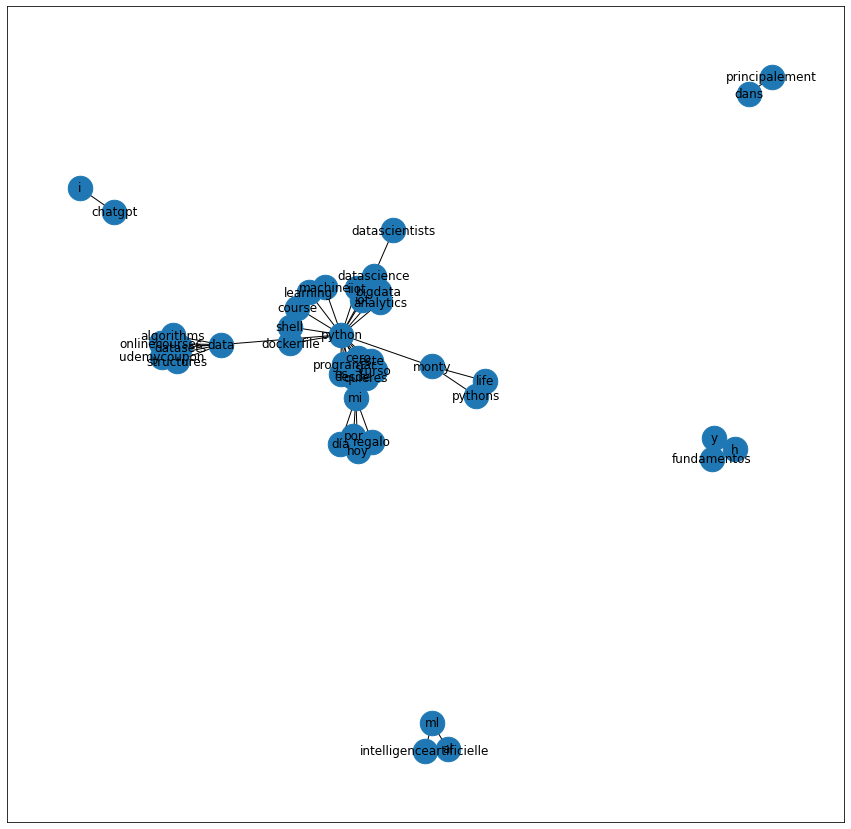

In [33]:
# 텍스트 파일 읽어서 엣지 리스트 그래프 그리기
G = nx.read_edgelist("edge_list.txt", create_using = nx.Graph())

# 그래프를 반복해서 그려보며 불필요한 노드 삭제
# (예시) G.remove_nodes_from(['thanks', 'i', '@', 'pm', 'n', 'sooo', 'truckers', 'caught', 'thousands', 'henry'])
G.remove_nodes_from(['microsofts','topacquisitions'])

plt.figure(figsize=(15, 15))
nx.draw_networkx(G, node_size=600)

(-0.515243745528166,
 1.0383175855042988,
 -0.6330925334258667,
 1.1551807384703312)

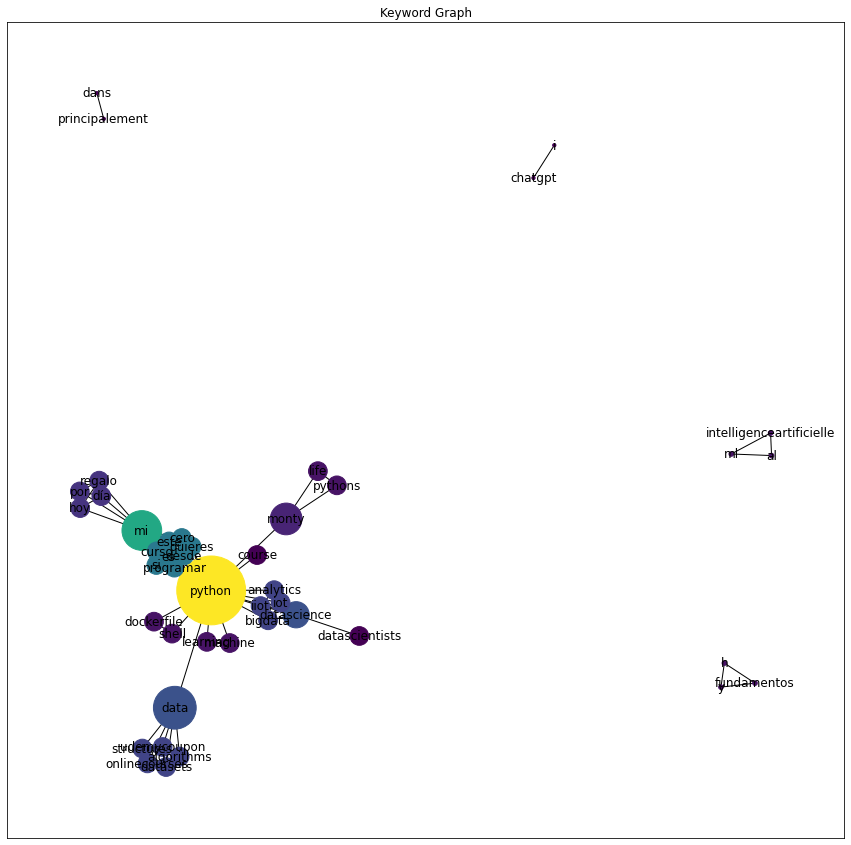

In [34]:
# 그래프는 노드의 위치가 정해져있지 않다.
pos = nx.spring_layout(G) # 노드 그래프를 그려주는 레이아웃을 spring_layout으로 한다
# pos = nx.kamada_kawai_layout(G)
# pos = nx.fruchterman_reingold_layout(G)

# 매개 중심성 계산
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True) # 매개중심성
# 노드 색상 옵션
node_color = [20000.0 * G.degree(v) for v in G] # 연결정도에 따라 노드 색상이 달라지게
# 노드 사이즈 옵션
node_size =  [v * 10000 for v in betCent.values()] # 매개중심성에 따라 노드 크기가 달라지게

plt.figure(figsize=(15, 15)) # 그래프 사이즈
plt.title("Keyword Graph")
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size
                 )

plt.axis('on') # 가장자리 박스 만들기

In [35]:
# 매개 중심성 높은 순서대로 보기

sorted(betCent, key=betCent.get, reverse=True)[:5] # 5개까지

['python', 'data', 'mi', 'monty', 'datascience']

In [37]:
# 노드별로 중심성 보기

# 매개 중심성 (betweenness centrality)
print(nx.betweenness_centrality(G).get('python'))    # 그래프에 보이는 노드 바꿔보며 입력해보기

# 연결 중심성 (degree centrality)
print(nx.degree_centrality(G).get('data'))         # 그래프에 보이는 노드 바꿔보며 입력해보기

# 근접 중심성 (closeness_centrality)
print(nx.closeness_centrality(G).get('mi'))      # 그래프에 보이는 노드 바꿔보며 입력해보기


0.45957918050941304
0.13953488372093023
0.415173465497522


# 나만의 키워드를 선정하고, 분석 결과 정리하기

- 살펴보고 싶은 키워드를 선정 (영어 단어)
- 자신의 프로젝트에 맞게 변수를 커스터마이징
  - keyword
  - until
  - items
- 단어의 동시 출현 빈도 현황에 따라 min_num 조절
- 그래프를 반복해서 그려보며 불필요한 노드를 삭제